## Presented by: Sharath sasidharan

## Spark Foundation

## Task 1: Prediction using Supervised Machine Learning

## Probelm Statement: Predict the percentage of an student based on the no. of study hours

## Importing the necessary libraries for the task

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,5)

In [2]:
df = 'http://bit.ly/w-data'
df = pd.read_csv(df)

This is the head of the data set. where the first 5 row of information is dispalyed. 

In [3]:
## This is the top 5 rows of the dataset.
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


This is the tail of the dataset where the last 5 records of this particular dataset is displayed.

In [4]:
## Bottom 5 rows of the dataset
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
# Info function to see if the data type of each variables in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
# Describe function is used to see the mean, standard dev, minimum and maximum of the numerical variables in the data set.
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
# There are no null values in the data set.
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
df.shape

(25, 2)

In [9]:
df.duplicated().sum() 

0

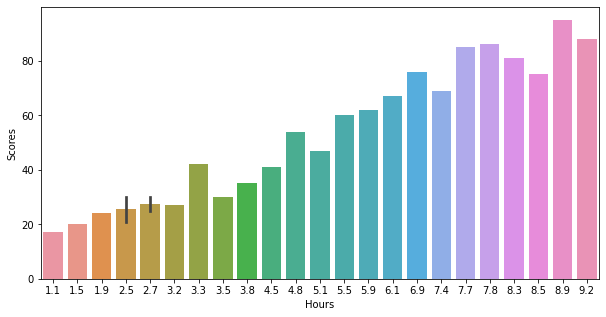

In [10]:
# This plot shows the relation between hours and scores the students have got. 
plt.figure(figsize=(10,5))
sns.barplot(df['Hours'],df['Scores']);

We can see a pattern here more hours they study more marks they scored. 

<AxesSubplot:xlabel='Scores', ylabel='Hours'>

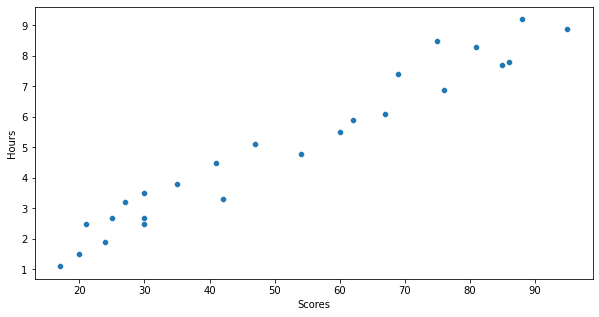

In [11]:
sns.scatterplot(df['Scores'],df['Hours'])

<AxesSubplot:>

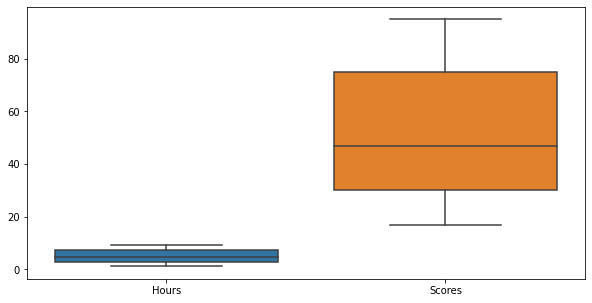

In [12]:
sns.boxplot(data=df)

<AxesSubplot:xlabel='Scores'>

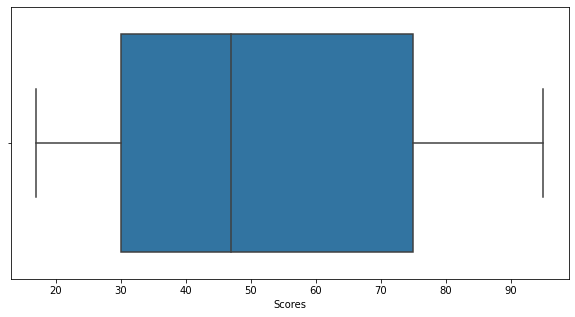

In [13]:
sns.boxplot(df['Scores'])

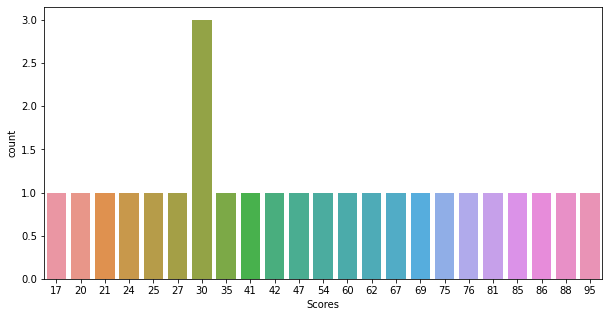

In [14]:
sns.countplot(df['Scores']);

<AxesSubplot:xlabel='Hours', ylabel='count'>

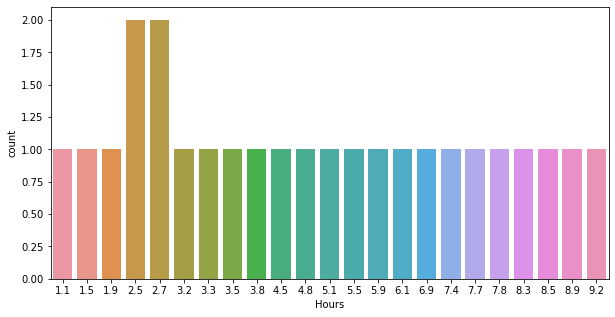

In [15]:
sns.countplot(df['Hours'])

In [16]:
X = df.drop(['Scores'],axis=1)
y = df['Scores']

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=1) 

In [18]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [19]:
## Accuracy for the training dataset
print(('Training accuracy is'),regression_model.score(X_train,y_train)) 

Training accuracy is 0.9637848283990599


In [20]:
print(('Testing accuracy is'),regression_model.score(X_test,y_test)) 

Testing accuracy is 0.8421031525243527


In [21]:
study_Hours =  9.25
y_pred = regression_model.predict([[study_Hours]])

In [22]:
Prediction = pd.DataFrame(y_pred)
Prediction.head()

,0
0,95.228294


In [23]:
print('No.of.hours of study = {}'.format(study_Hours)) 
print("Predicted Score = {}".format(y_pred[0]))

No.of.hours of study = 9.25
Predicted Score = 95.22829438402952


In [24]:
#Mean square error of the model
mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [25]:
import math
math.sqrt(mse)

8.299453038771674